In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
al_thickness, al_counts, al_times = np.loadtxt("../data/counts_cs137_alu.csv",skiprows=1, unpack=True, delimiter=',')
al_rates = al_counts / al_times
al_thickness = al_thickness / 10 # convert in cm
al_rates_sigma = al_rates * (ERROR_ATTENUATION_COUNT / al_counts + ERROR_TIME / al_times)
# TODO: put errors in description because small

al_params, al_cov = np.polyfit(al_thickness, np.log(al_rates),1, cov=True)
sigma_al_params = np.sqrt(np.diag(al_cov))

# mu coefficient d'attenuation linéaire, I0 intensité du faisceau
mu_al = al_params[0]
sigma_mu_al = sigma_al_params[0]
I0_al = np.exp(al_params[1])
sigma_I0_al = sigma_al_params[1] * I0_al

print(f"Attenuation coefficient pour alu: {abs(al_params[0]):.2f} ± {sigma_al_params[0]:.2f}, I_0 = {I0_al:.2f} ± {sigma_I0_al:.2f}")


Attenuation coefficient pour alu: 0.20 ± 0.01, I_0 = 111.34 ± 1.95


In [3]:
pb_thickness, pb_counts, pb_times = np.loadtxt("../data/counts_cs137_pb.csv",skiprows=1, unpack=True, delimiter=',')
pb_rates = pb_counts / pb_times
pb_thickness = pb_thickness / 10 # convert in cm
pb_rates_sigma = pb_rates * (ERROR_ATTENUATION_COUNT / pb_counts + ERROR_TIME / pb_times)

pb_params, pb_cov = np.polyfit(pb_thickness, np.log(pb_rates), 1, cov=True)
sigma_pb_params = np.sqrt(np.diag(pb_cov))

mu_pb = pb_params[0]
sigma_mu_pb = sigma_pb_params[0]
I0_pb = np.exp(pb_params[1])
sigma_I0_pb = sigma_pb_params[1] * I0_pb

print(f"Attenuation coefficient pour plomb: {abs(pb_params[0]):.2f} ± {sigma_pb_params[0]:.2f}, I_0 = {I0_pb:.2f} ± {sigma_I0_pb:.2f}")

Attenuation coefficient pour plomb: 1.08 ± 0.03, I_0 = 116.13 ± 4.73


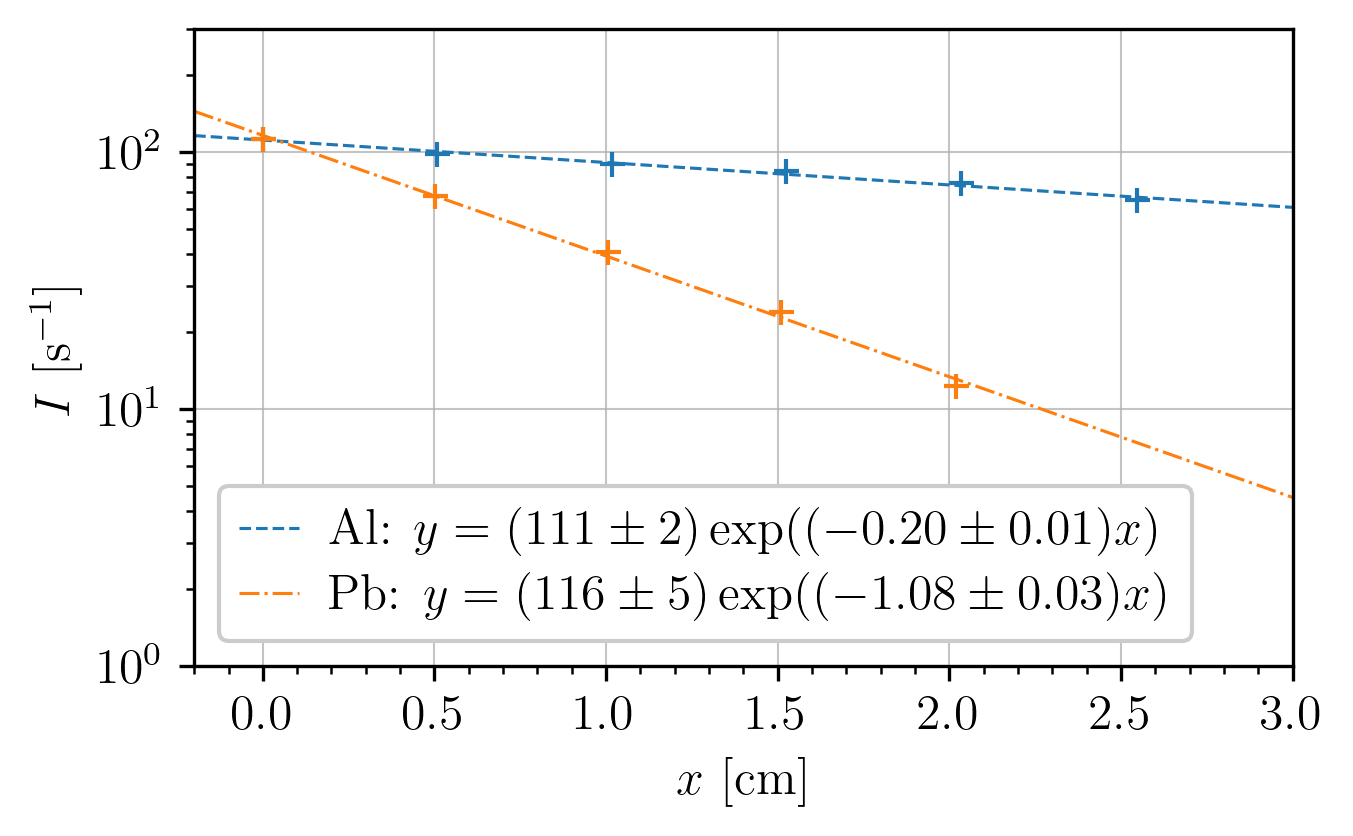

In [4]:
# === Plot ensemble ===
fig, ax = plt.subplots(1,1, figsize=(12*INCH_PER_CM,7*INCH_PER_CM), dpi=300)
p = plt.rcParams
p["lines.linewidth"] = 0.75
plt.yscale('log')
plt.xlabel("$x$ [cm]")
plt.ylabel(r"$I$ [s$^{-1}$]")

left_xlim = -0.2
right_xlim = 3
bottom_ylim = 1
top_ylim = 300
plt.xlim(left_xlim, right_xlim)
plt.ylim(bottom_ylim, top_ylim)
x = np.linspace(left_xlim,right_xlim,50)

plt.errorbar(al_thickness, al_rates,
             ls='', marker='+', c='C0')
plt.plot(x, np.exp(al_params[0]*x)*np.exp(al_params[1]),
         ls='--', c='C0',
         label=f'Al: $y = ({I0_al:.0f} \\pm {sigma_I0_al:.0f}) \\exp(({{ {mu_al:.2f} \\pm {sigma_mu_al:.2f}}})x)$')

plt.errorbar(pb_thickness, pb_rates,
             ls='', marker='+', c='C1')
plt.plot(x, np.exp(pb_params[0]*x)*np.exp(pb_params[1]),
         ls='-.', c='C1',
         label=f'Pb: $y = ({I0_pb:.0f} \\pm {sigma_I0_pb:.0f}) \\exp(({{ {mu_pb:.2f} \\pm {sigma_mu_pb:.2f}}})x)$')

plt.legend()
plt.savefig('../figures/attenuation_coefficient.pdf')

Mass attenuation

In [16]:
DENSITY_AL = ufloat(2.69890, 0.00001)  # g/cm³
mu_al = ufloat(-al_params[0], sigma_al_params[0])
mu_d_al = mu_al / DENSITY_AL
rel_err = abs(mu_d_al.n - 0.07802) / 0.07802
print(fr"{mu_d_al:.2upL} cm²/g", rel_err)

\left(0.0744 \pm 0.0042\right) cm²/g 0.04599790307695814


In [15]:
DENSITY_PB = ufloat(11.3500, 0.0001)  # g/cm³
mu_pb = ufloat(-pb_params[0], sigma_pb_params[0])
mu_d_pb = mu_pb / DENSITY_PB
print(fr"{mu_d_pb:.2upL} cm²/g")

\left(0.0953 \pm 0.0029\right) cm²/g
